In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/blr_city_data.csv')

In [3]:
df.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Time,Day,Month,Year
0,2015-01-01 01:00:00,30.42,69.580,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,84.0,01:00:00,1,1,2015
1,2015-01-01 02:00:00,27.56,59.660,2.20,12.11,7.54,17.81,0.21,4.23,12.13,0.56,4.54,83.0,02:00:00,1,1,2015
2,2015-01-01 03:00:00,24.94,53.600,1.66,10.82,6.52,17.42,0.30,4.28,13.13,0.52,4.20,82.0,03:00:00,1,1,2015
3,2015-01-01 04:00:00,22.94,49.920,1.92,10.32,6.46,16.86,0.13,4.14,11.82,0.47,4.63,81.0,04:00:00,1,1,2015
4,2015-01-01 05:00:00,22.57,49.755,1.94,9.82,6.22,16.35,0.15,4.26,10.31,0.48,3.91,78.0,05:00:00,1,1,2015


# Adding extra features

## Seasons in India


##### Winter: December to February
##### Summer: March to May
##### Monsoon: June to September
##### Autumn: October to November

In [4]:
season_dict = {
    12 : 'Winter',
    1 : 'Winter',
    2 : 'Winter',
    3 : 'Summer',
    4 : 'Summer',
    5 : 'Summer',
    6 : 'Monsoon',
    7 : 'Monsoon',
    8 : 'Monsoon',
    9 : 'Monsoon',
    10 : 'Autumn',
    11 : 'Autumn',
}

In [5]:
df['Season'] = df['Month'].map(season_dict)

In [6]:
df.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Time,Day,Month,Year,Season
0,2015-01-01 01:00:00,30.42,69.580,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,84.0,01:00:00,1,1,2015,Winter
1,2015-01-01 02:00:00,27.56,59.660,2.20,12.11,7.54,17.81,0.21,4.23,12.13,0.56,4.54,83.0,02:00:00,1,1,2015,Winter
2,2015-01-01 03:00:00,24.94,53.600,1.66,10.82,6.52,17.42,0.30,4.28,13.13,0.52,4.20,82.0,03:00:00,1,1,2015,Winter
3,2015-01-01 04:00:00,22.94,49.920,1.92,10.32,6.46,16.86,0.13,4.14,11.82,0.47,4.63,81.0,04:00:00,1,1,2015,Winter
4,2015-01-01 05:00:00,22.57,49.755,1.94,9.82,6.22,16.35,0.15,4.26,10.31,0.48,3.91,78.0,05:00:00,1,1,2015,Winter


### Mean Encoding Seasons

In [7]:
seasons = df['Season'].unique()
seasons

array(['Winter', 'Summer', 'Monsoon', 'Autumn'], dtype=object)

In [8]:
df_copy = df.copy()

In [9]:
df_copy['Time_Season'] = df_copy['Time'].astype(str) + df_copy['Season'].astype(str)

In [13]:
time_seasons = df_copy['Time_Season'].unique()
time_seasons

array(['01:00:00Winter', '02:00:00Winter', '03:00:00Winter',
       '04:00:00Winter', '05:00:00Winter', '06:00:00Winter',
       '07:00:00Winter', '08:00:00Winter', '09:00:00Winter',
       '10:00:00Winter', '11:00:00Winter', '12:00:00Winter',
       '13:00:00Winter', '14:00:00Winter', '15:00:00Winter',
       '16:00:00Winter', '17:00:00Winter', '18:00:00Winter',
       '19:00:00Winter', '20:00:00Winter', '21:00:00Winter',
       '22:00:00Winter', '23:00:00Winter', '00:00:00Winter',
       '00:00:00Summer', '01:00:00Summer', '02:00:00Summer',
       '03:00:00Summer', '04:00:00Summer', '05:00:00Summer',
       '06:00:00Summer', '07:00:00Summer', '08:00:00Summer',
       '09:00:00Summer', '10:00:00Summer', '11:00:00Summer',
       '12:00:00Summer', '13:00:00Summer', '14:00:00Summer',
       '15:00:00Summer', '16:00:00Summer', '17:00:00Summer',
       '18:00:00Summer', '19:00:00Summer', '20:00:00Summer',
       '21:00:00Summer', '22:00:00Summer', '23:00:00Summer',
       '00:00:00Monsoon'

In [17]:
time_season_dict = dict()
for t_s in time_seasons:
    mean = df_copy[df_copy['Time_Season']==t_s]['AQI'].mean()
    time_season_dict[t_s] = mean

In [18]:
time_season_dict

{'01:00:00Winter': 104.67906066536203,
 '02:00:00Winter': 103.78864970645793,
 '03:00:00Winter': 103.11154598825831,
 '04:00:00Winter': 101.9041095890411,
 '05:00:00Winter': 99.7436399217221,
 '06:00:00Winter': 98.65557729941291,
 '07:00:00Winter': 98.19569471624266,
 '08:00:00Winter': 98.36986301369863,
 '09:00:00Winter': 98.40117416829746,
 '10:00:00Winter': 99.08414872798434,
 '11:00:00Winter': 100.58904109589041,
 '12:00:00Winter': 102.69667318982387,
 '13:00:00Winter': 105.43052837573386,
 '14:00:00Winter': 107.11154598825831,
 '15:00:00Winter': 108.4774951076321,
 '16:00:00Winter': 109.2133072407045,
 '17:00:00Winter': 109.61252446183953,
 '18:00:00Winter': 109.14481409001957,
 '19:00:00Winter': 110.08219178082192,
 '20:00:00Winter': 111.1917808219178,
 '21:00:00Winter': 110.52739726027397,
 '22:00:00Winter': 109.89236790606654,
 '23:00:00Winter': 108.60469667318982,
 '00:00:00Winter': 107.00784313725491,
 '00:00:00Summer': 96.06159420289855,
 '01:00:00Summer': 94.84782608695652,

In [19]:
df['Time_Season_Mean'] = df_copy['Time_Season'].map(time_season_dict)

In [22]:
df.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Time,Day,Month,Year,Season,Time_Season_Mean
0,2015-01-01 01:00:00,30.42,69.580,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,84.0,01:00:00,1,1,2015,Winter,104.679061
1,2015-01-01 02:00:00,27.56,59.660,2.20,12.11,7.54,17.81,0.21,4.23,12.13,0.56,4.54,83.0,02:00:00,1,1,2015,Winter,103.788650
2,2015-01-01 03:00:00,24.94,53.600,1.66,10.82,6.52,17.42,0.30,4.28,13.13,0.52,4.20,82.0,03:00:00,1,1,2015,Winter,103.111546
3,2015-01-01 04:00:00,22.94,49.920,1.92,10.32,6.46,16.86,0.13,4.14,11.82,0.47,4.63,81.0,04:00:00,1,1,2015,Winter,101.904110
4,2015-01-01 05:00:00,22.57,49.755,1.94,9.82,6.22,16.35,0.15,4.26,10.31,0.48,3.91,78.0,05:00:00,1,1,2015,Winter,99.743640


<AxesSubplot:>

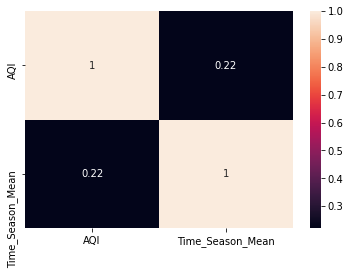

In [23]:
sns.heatmap(df[['AQI','Time_Season_Mean']].corr(),annot=True)

## Dropping Day,Month,Year,Season, Time

In [24]:
df = df.drop(['Day','Month','Year','Season','Time'],axis=1)

In [25]:
df.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Time_Season_Mean
0,2015-01-01 01:00:00,30.42,69.580,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,84.0,104.679061
1,2015-01-01 02:00:00,27.56,59.660,2.20,12.11,7.54,17.81,0.21,4.23,12.13,0.56,4.54,83.0,103.788650
2,2015-01-01 03:00:00,24.94,53.600,1.66,10.82,6.52,17.42,0.30,4.28,13.13,0.52,4.20,82.0,103.111546
3,2015-01-01 04:00:00,22.94,49.920,1.92,10.32,6.46,16.86,0.13,4.14,11.82,0.47,4.63,81.0,101.904110
4,2015-01-01 05:00:00,22.57,49.755,1.94,9.82,6.22,16.35,0.15,4.26,10.31,0.48,3.91,78.0,99.743640


## Saving Data and mapping dictionaries

In [27]:
import pickle

In [29]:
with open('Data/season_map.pkl', 'wb') as handle:
    pickle.dump(season_dict, handle)

In [30]:
with open('Data/time_season_dict.pkl', 'wb') as handle:
    pickle.dump(time_season_dict, handle)

In [31]:
df.to_csv('Data/blr_data_final.csv',index=False)